<a href="https://colab.research.google.com/github/fardsnog2/ML_vvsu/blob/main/clas_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Промежуточная аттестация по сетям искусcтвенных нейронов.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    


## Данные

**Загружаем данные**

In [1]:
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
import numpy as np
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

## Визаулизация датасета

**Используйте matplotlib чтобы показать пример картинки.**

In [2]:
import matplotlib.pyplot as plt

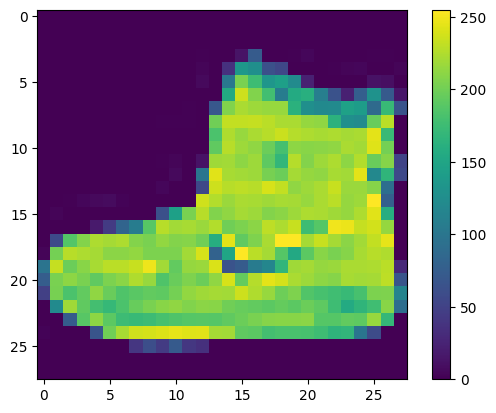

In [3]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Предобработка

**Нормализуйте данные X_train и X_test **

In [4]:
x_train = x_train / 255.0

x_test = x_test / 255.0

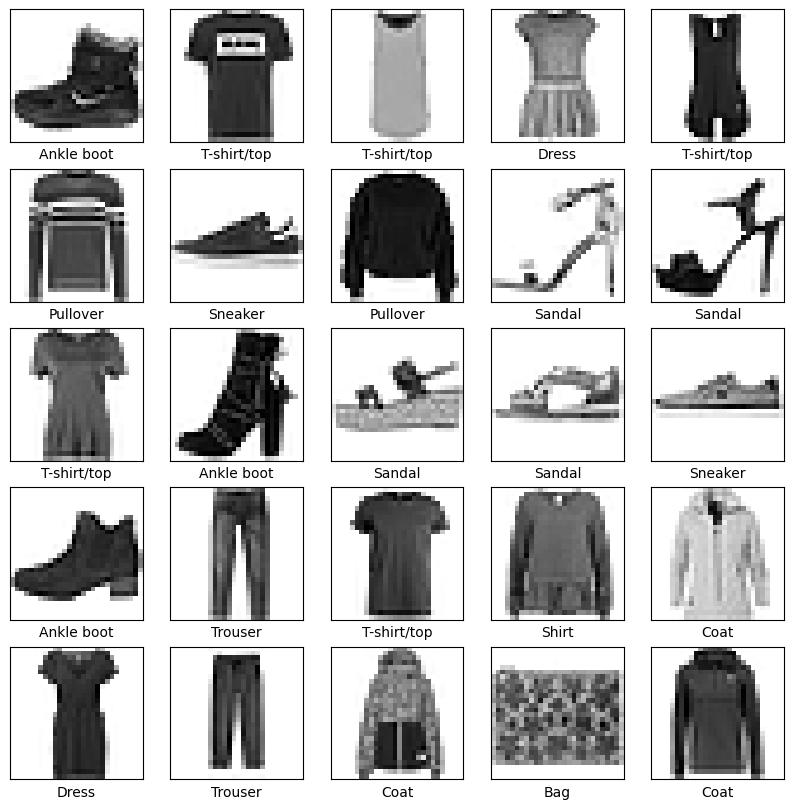

In [5]:
#Проверить данные

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

**Измените форму массивов X_train и X_test так, чтобы они стали 4-мерными**
batch_size x channels x H x W

In [6]:
n_input = 784
batch_size = 32
img_height = 28
img_width = 28
x_train=x_train[...,None]
x_train.shape

(60000, 28, 28, 1)

In [7]:
x_test=x_test[...,None]
x_test.shape

(10000, 28, 28, 1)

**Преобразуйте  y_train и y_test в one_hot представления **

In [8]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical

In [9]:

data = array(y_test)
print(data)
y_test = to_categorical(data)
print(y_test)

[9 2 1 ... 8 1 5]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
data = array(y_train)
print(data)
y_train = to_categorical(data)
print(y_train)

[9 0 0 ... 3 0 5]
[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Создайте модель

**Примерная структура модели. При выполнении задания вы можете поэкспериментировать со слоями**

* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)
* Полносвязный слой (например 128 нейронов), RELU

* Выходной полносвязный слой с 10 нейронами с softmax

**При компиляции укажите loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (4, 4)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.build((None,28,28,1))
model.summary()
history=model.fit(x_train, y_train, epochs=10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 53s 28ms/step - loss: 0.4062 - accuracy: 0.8529
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2755 - accuracy: 0.9006
Epoch 3/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2270 - accuracy: 0.9168
Epoch 4/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1917 - accuracy: 0.9310
Epoch 5/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1650 - accuracy: 0.9406
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1431 - accuracy: 0.9478
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1240 - accuracy: 0.9558
Epoch 8/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1086 - accuracy: 0.9620
Epoch 9/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0936 - accuracy: 0.9674
Epoch 10/10
1875/1875 [==============================] - 44s 23ms/step - lo

In [16]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (4, 4)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')
])
model1.compile(optimizer='rmsprop',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model1.build((None,28,28,1))
model1.summary()
history=model1.fit(x_train, y_train, epochs=10)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                46090     
                                                                 
Total params: 46634 (182.16 KB)
Trainable params: 46634 (182.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 27s 14ms/step - loss: 0.4628 - accuracy: 0.8386
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3516 - accuracy: 0.8774
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3171 - accuracy: 0.8896
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2976 - accuracy: 0.8965
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2818 - accuracy: 0.9015
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2693 - accuracy: 0.9070
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2599 - accuracy: 0.9105
Epoch 8/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2509 - accuracy: 0.9129
Epoch 9/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2435 - accuracy: 0.9158
Epoch 10/10
1875/1875 [==============================] - 27s 14ms/step - lo

In [18]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (4, 4)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model2.compile(optimizer='rmsprop',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model2.build((None,28,28,1))
model2.summary()
history=model.fit(x_train, y_train, epochs=10)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 4608)              0         
                                                                 
 dense_7 (Dense)             (None, 64)                294976    
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 296170 (1.13 MB)
Trainable params: 296170 (1.13 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

### Оценка модели

**Оцените модель по метрикам accuracy,precision,recall,f1-score на тестовой выборке x_test **

In [19]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('acc = ',test_acc )
test_loss

313/313 - 2s - loss: 0.7779 - accuracy: 0.9003 - 2s/epoch - 6ms/step
acc =  0.9003000259399414


0.777865469455719

In [20]:
test_loss, test_acc = model1.evaluate(x_test,  y_test, verbose=2)
print('acc = ',test_acc )
test_loss

313/313 - 2s - loss: 0.3069 - accuracy: 0.8935 - 2s/epoch - 5ms/step
acc =  0.8934999704360962


0.306919664144516

In [21]:
test_loss, test_acc = model2.evaluate(x_test,  y_test, verbose=2)
print('acc = ',test_acc )
test_loss

313/313 - 3s - loss: 2.3051 - accuracy: 0.1213 - 3s/epoch - 9ms/step
acc =  0.12129999697208405


2.305097818374634

In [22]:
test_predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 2s 6ms/step


In [23]:
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
data = array(test_predictions)
test_predictions = to_categorical(data)
print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.87      0.81      0.84      1000
           3       0.89      0.91      0.90      1000
           4       0.86      0.83      0.85      1000
           5       0.97      0.97      0.97      1000
           6       0.70      0.79      0.74      1000
           7       0.96      0.94      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.95      0.96      0.95      1000

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000
 samples avg       0.90      0.90      0.90     10000



313/313 [==============================] - 3s 9ms/step


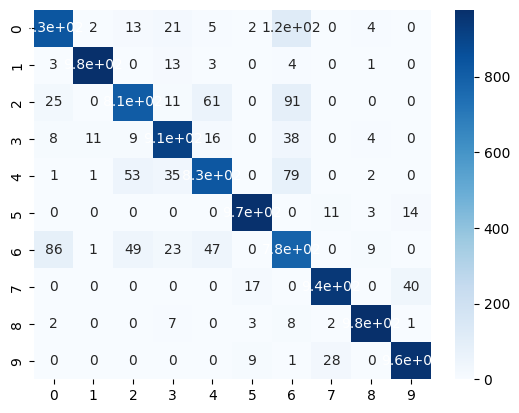

In [34]:
import seaborn as sns
test_predictions = np.argmax(model.predict(x_test), axis=-1)
cf_matrix = confusion_matrix(y_test.argmax(axis=1), test_predictions)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

In [35]:
cf_matrix

array([[833,   2,  13,  21,   5,   2, 120,   0,   4,   0],
       [  3, 976,   0,  13,   3,   0,   4,   0,   1,   0],
       [ 25,   0, 812,  11,  61,   0,  91,   0,   0,   0],
       [  8,  11,   9, 914,  16,   0,  38,   0,   4,   0],
       [  1,   1,  53,  35, 829,   0,  79,   0,   2,   0],
       [  0,   0,   0,   0,   0, 972,   0,  11,   3,  14],
       [ 86,   1,  49,  23,  47,   0, 785,   0,   9,   0],
       [  0,   0,   0,   0,   0,  17,   0, 943,   0,  40],
       [  2,   0,   0,   7,   0,   3,   8,   2, 977,   1],
       [  0,   0,   0,   0,   0,   9,   1,  28,   0, 962]])

In [105]:
from numpy import asarray
def image_to_array(img):
    img = img.resize((28,28))
    img=img.convert('L')
    numpydata = asarray(img)
    numpydata = numpydata / 255.0
    numpydata=numpydata[...,None]
    return numpydata

In [106]:
from PIL import Image

In [107]:
img = Image.open("/content/1675797910_gas-kvas-com-p-trafaret-risunok-dzhinsi-32.png")

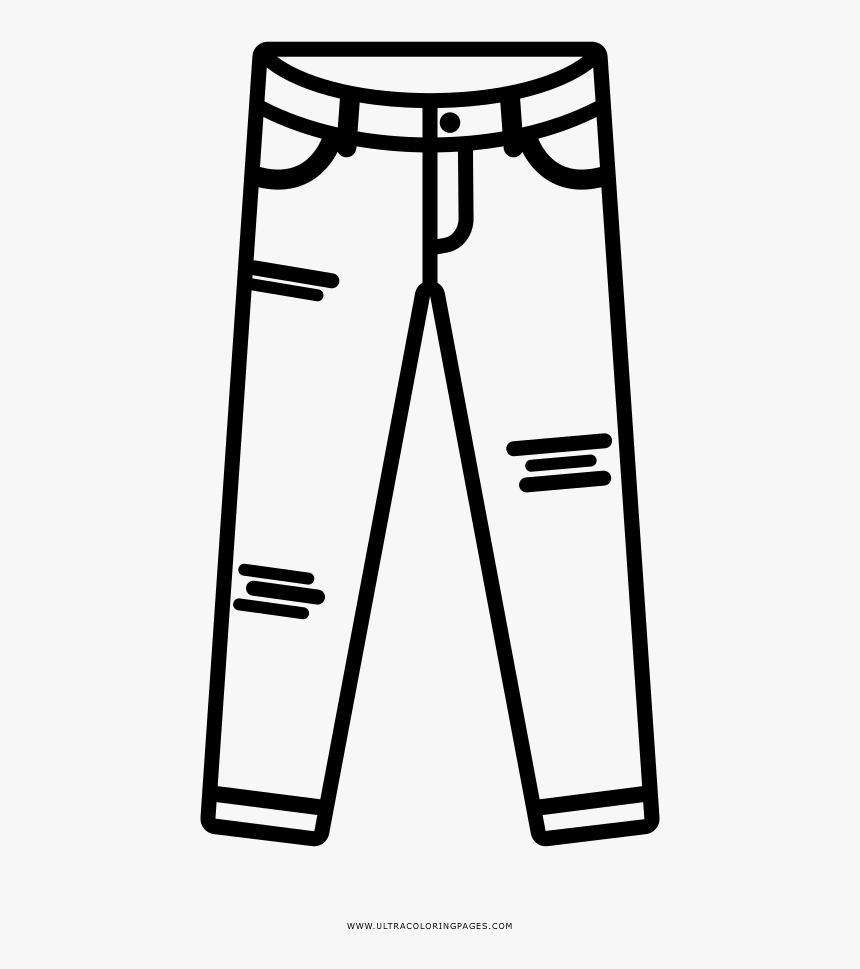

In [108]:
display(img)

In [109]:
img_ar = image_to_array(img)

In [110]:
img_ar.shape

(28, 28, 1)

In [116]:
x_test.shape

(10000, 28, 28, 1)

In [112]:
def predict_model(ar):
    pred_y = model.predict([ar])
    print(pred_y)

In [113]:
test = predict_model(img_ar)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer 'conv2d_1' (type Conv2D).
    
    Negative dimension size caused by subtracting 4 from 1 for '{{node sequential_1/conv2d_1/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_1/ExpandDims, sequential_1/conv2d_1/Conv2D/ReadVariableOp)' with input shapes: [?,28,1,1], [4,4,1,32].
    
    Call arguments received by layer 'conv2d_1' (type Conv2D):
      • inputs=tf.Tensor(shape=(None, 28, 1, 1), dtype=float32)


In [117]:
x_train[0].shape

(28, 28, 1)